In [253]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [254]:
df=pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

In [255]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [257]:
df.isnull().value_counts()

Rank   Country  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  Local Purchasing Power Index
False  False    False                 False       False                           False            False                   False                           121
Name: count, dtype: int64

In [258]:
dfraw=df.drop("Rank",axis=1)
dfraw=dfraw.drop("Country",axis=1)
dfraw.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,101.1,46.5,74.9,109.1,97.0,158.7
1,85.0,36.7,61.8,81.6,83.3,54.6
2,83.0,39.2,62.0,88.4,86.8,120.3
3,76.7,67.2,72.1,74.6,50.4,111.1
4,76.6,19.0,48.9,80.8,69.4,43.5


<Axes: >

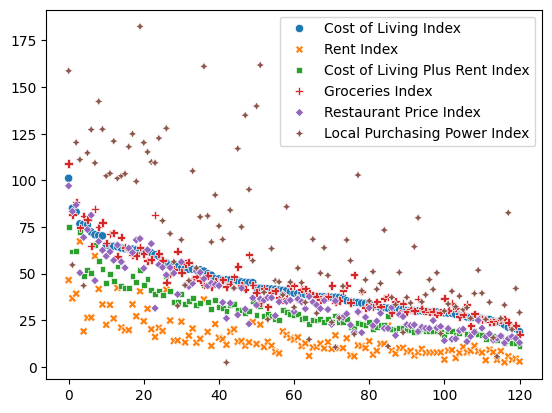

In [259]:
sns.scatterplot(dfraw)

In [260]:
scaler=MinMaxScaler(feature_range=(0,1))
dfraw=pd.DataFrame(scaler.fit_transform(dfraw),columns=dfraw.columns)

<Axes: >

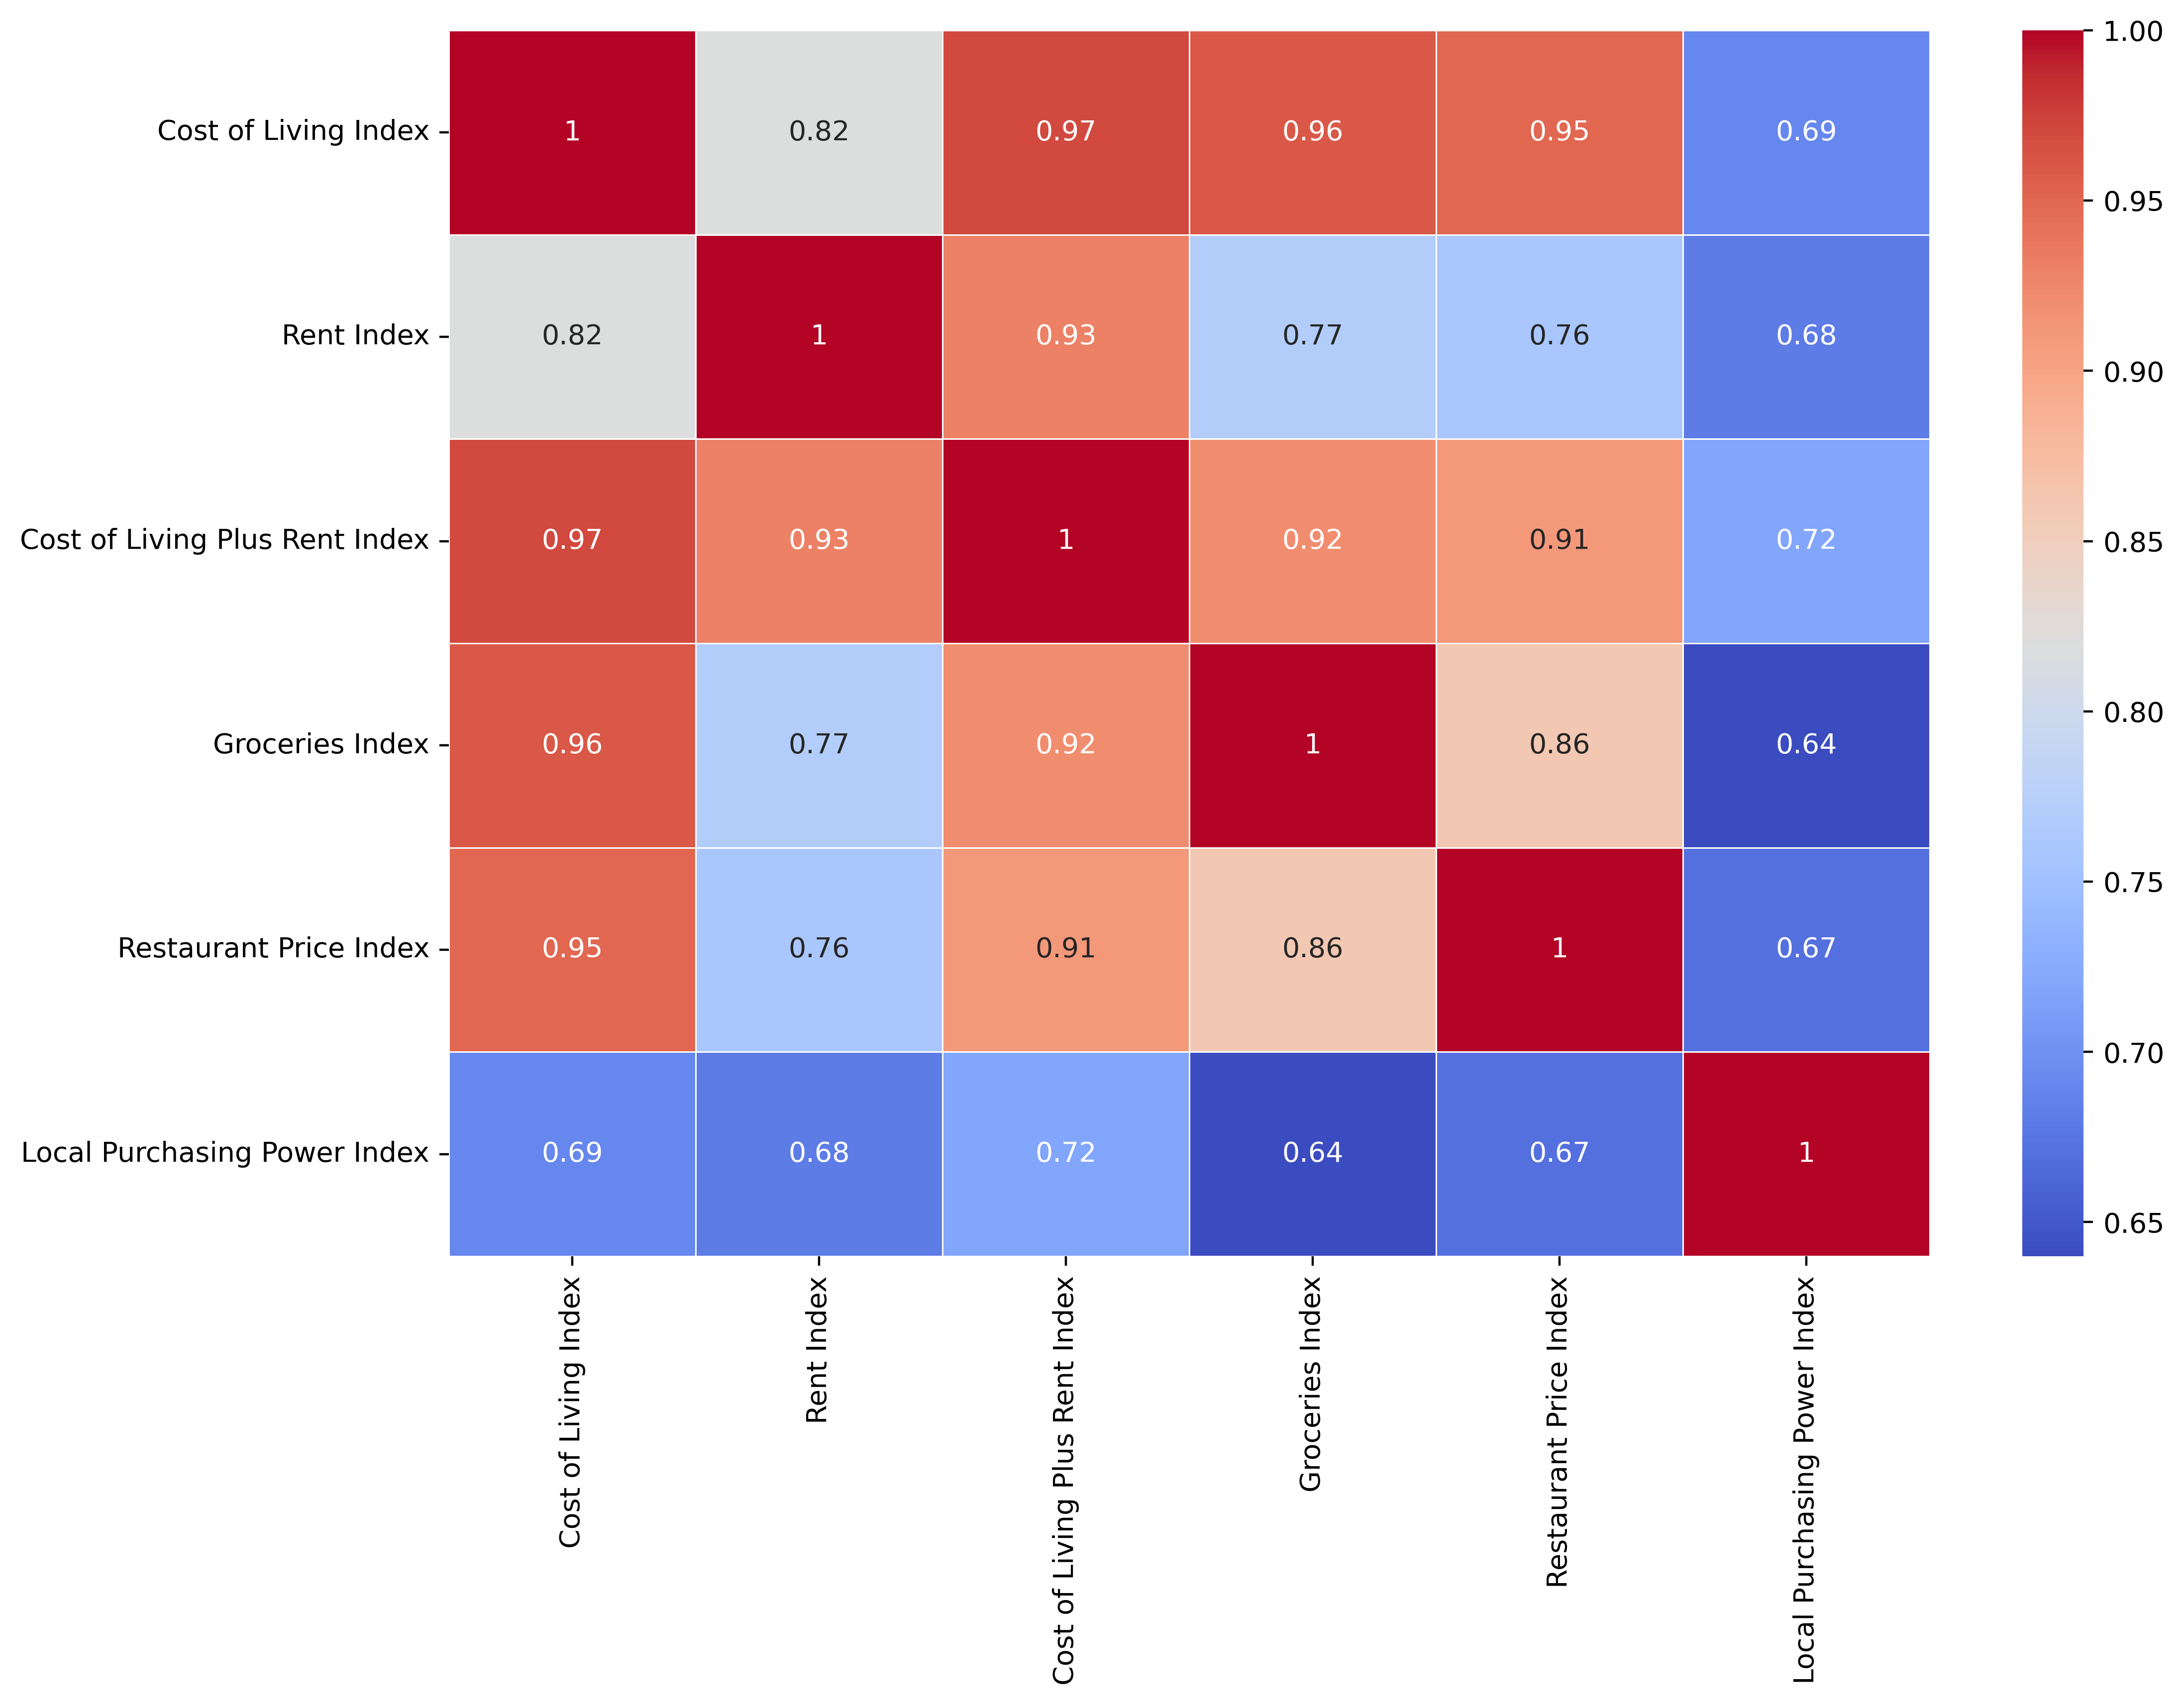

In [261]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(dfraw.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: ylabel='Local Purchasing Power Index'>

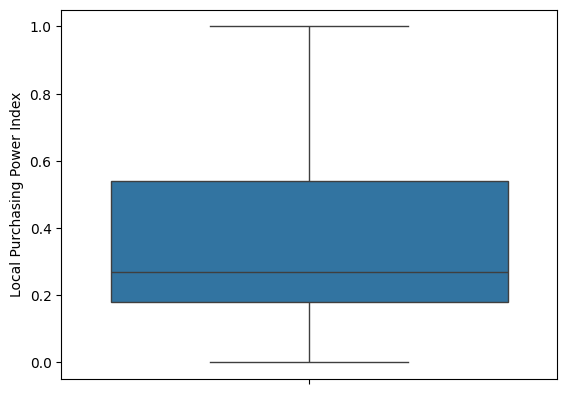

In [262]:
sns.boxplot(dfraw["Local Purchasing Power Index"])

<Axes: ylabel='Restaurant Price Index'>

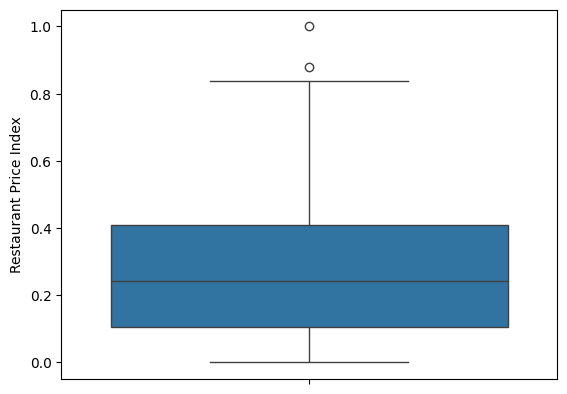

In [263]:
sns.boxplot(dfraw["Restaurant Price Index"])

<Axes: ylabel='Groceries Index'>

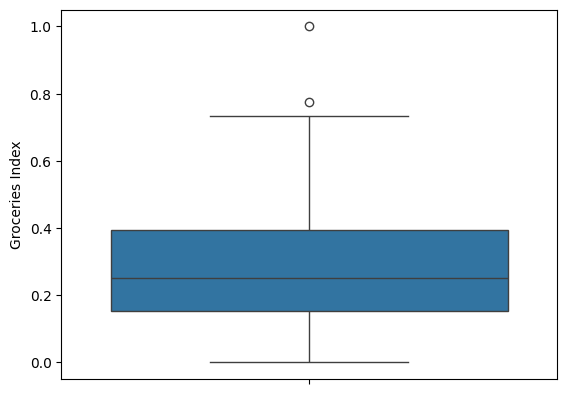

In [264]:
sns.boxplot(dfraw["Groceries Index"])

<Axes: ylabel='Cost of Living Index'>

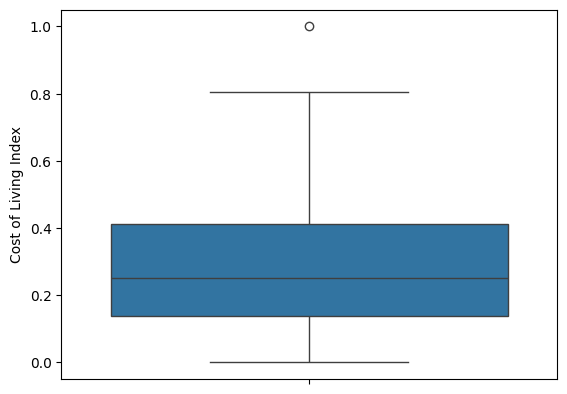

In [265]:
sns.boxplot(dfraw["Cost of Living Index"])

<Axes: ylabel='Rent Index'>

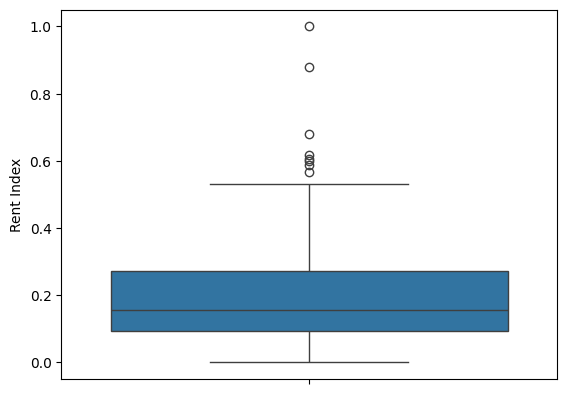

In [266]:
sns.boxplot(dfraw["Rent Index"])

<Axes: ylabel='Cost of Living Plus Rent Index'>

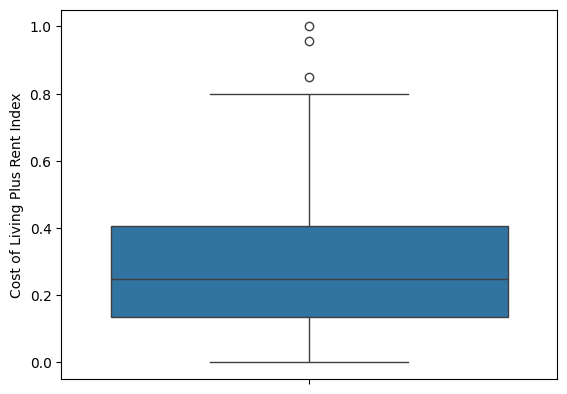

In [267]:
sns.boxplot(dfraw["Cost of Living Plus Rent Index"])

#### Outliers will not be dropped becuase each row represents one country and there are only 121 countries in this dataset. 

In [268]:
X=dfraw.drop("Cost of Living Index",axis=1)
y=dfraw["Cost of Living Index"]
print(y)

0      1.000000
1      0.804374
2      0.780073
3      0.703524
4      0.702309
         ...   
116    0.044957
117    0.029162
118    0.026731
119    0.019441
120    0.000000
Name: Cost of Living Index, Length: 121, dtype: float64


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# X_train=preprocessing.normalize(X_train)
# X_test=preprocessing.normalize(X_test)

In [271]:
model = KMeans(n_clusters=6,random_state=42,n_init='auto')
model.fit(X_train)


KMeans(n_clusters=6, random_state=42)

In [272]:
#sns.scatterplot(data=X_train,hue=model.labels_)

#### PCA

In [273]:
pca=PCA(n_components=2).fit_transform(X_train)

In [274]:
kmeans=KMeans(n_clusters=6,n_init=4)
kmeans.fit(pca)

KMeans(n_clusters=6, n_init=4)

In [275]:
ypred=kmeans.predict(pca)
plt.scatter(X_train[:, 0], X_train[:, 1], c=ypred, s=50, cmap='viridis')

InvalidIndexError: (slice(None, None, None), 0)

#### Linear Regression

In [249]:
X=dfraw.drop("Cost of Living Index",axis=1)
y=dfraw["Cost of Living Index"]


In [250]:
model = LinearRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [251]:
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)

r2:  0.20703224681193655 rmse:  0.18999242307826184


In [252]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)

r2:  0.4179499529232671 rmse:  0.16277536677389534
